# Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 

from tensorflow.keras import datasets, layers, models
from PIL import Image

# Loading Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
print(f'Training Data Size {train_images.shape}')
print(f'Testing Data Size {test_images.shape}')

Training Data Size (50000, 32, 32, 3)
Testing Data Size (10000, 32, 32, 3)


Individual Image Size: 32 x 32 (RGB)

In [5]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Displaying Sample Data

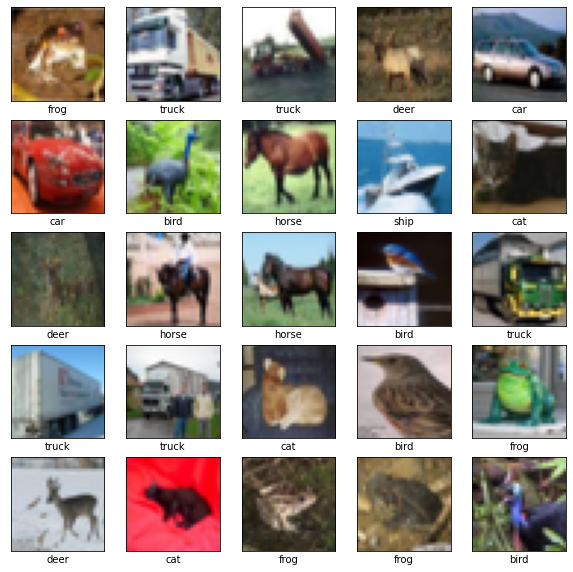

In [6]:
plt.figure(figsize=(10,10), facecolor=(1,1,1))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Creating Neural Network 

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training Neural Network

In [10]:
trained_model = model.fit(train_images, train_labels, epochs=10, 
                validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5260 - accuracy: 0.4450 - val_loss: 1.3563 - val_accuracy: 0.5105
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1773 - accuracy: 0.5799 - val_loss: 1.0782 - val_accuracy: 0.6185
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0209 - accuracy: 0.6395 - val_loss: 1.1020 - val_accuracy: 0.6078
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9221 - accuracy: 0.6746 - val_loss: 0.9390 - val_accuracy: 0.6719
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8486 - accuracy: 0.7041 - val_loss: 0.9602 - val_accuracy: 0.6680
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7864 - accuracy: 0.7230 - val_loss: 0.9142 - val_accuracy: 0.6822
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7386 - accuracy: 0.7394 - val_loss: 0.9057 -

# Testing Neural Network

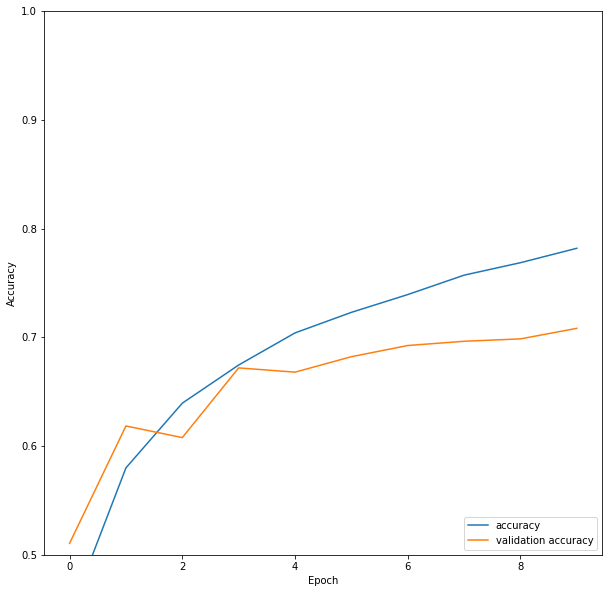

In [11]:
plt.figure(figsize=(10,10))
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history ['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.8715 - accuracy: 0.7083


# Predicting with Test Images (Dataset)

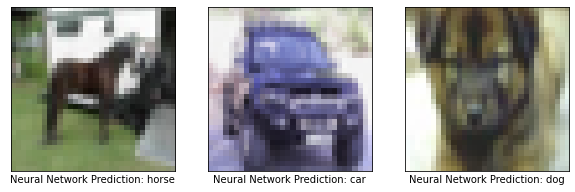

In [15]:
from random import randint

plt.figure(figsize=(10,5), facecolor=(1,1,1))
for i in range(3):
    index = randint(1,64)
    img_pred = 'Neural Network Prediction: ' + class_names[np.argmax(model.predict(test_images[index:index+1]))]
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.xlabel(img_pred)
plt.show()

# Predicting with Externally Sourced Images


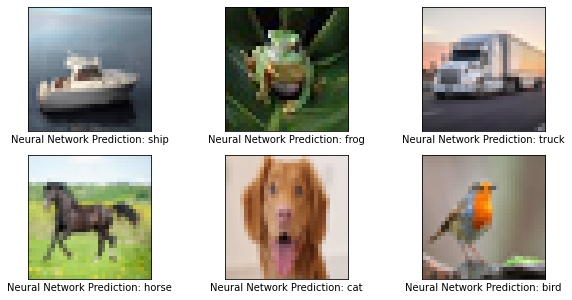

In [16]:
plt.figure(figsize=(10,5), facecolor=(1,1,1))
for i in range(6):
    x = 'external-testing-images/' + str(i+1) + '.jpg'
    img1 = Image.open(x).convert(mode="RGB")
    img1 = img1.resize((32,32))
    array1 = np.array(img1.getdata())
    img_np_array = np.reshape(array1, (32,32,3)) / 255.0
    final_pred = 'Neural Network Prediction: ' + class_names[np.argmax(model.predict(np.expand_dims(img_np_array, axis=0)))]
    
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(array1, (32,32,3)), cmap=plt.cm.binary)
    plt.xlabel(final_pred)
plt.show()

# Saving Neural Network

In [ ]:
model.save('cifar_cnn1.h5') # full model file 